In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
# Load dataset in Python
nba_data = pd.read_csv("PlayerStatistics.csv")

In [45]:
# Initial data exploration
nba_data.head()

,firstName,lastName,personId,gameId,gameDate,playerteamCity,playerteamName,opponentteamCity,opponentteamName,win,...,freeThrowsPercentage,reboundsDefensive,reboundsOffensive,reboundsTotal,foulsPersonal,turnovers,plusMinusPoints,playerName,playerTeam,opponentTeam
0,Kevin,Love,201567,22400523,2025-01-09 21:00:00,Miami,Heat,Utah,Jazz,1,...,0.0,0,0,0,0,0,0,Kevin Love,Miami Heat,Utah Jazz
1,Patty,Mills,201988,22400523,2025-01-09 21:00:00,Utah,Jazz,Miami,Heat,0,...,1.0,1,0,1,0,2,-3,Patty Mills,Utah Jazz,Miami Heat
2,Alec,Burks,202692,22400523,2025-01-09 21:00:00,Miami,Heat,Utah,Jazz,1,...,0.0,6,1,7,1,2,4,Alec Burks,Miami Heat,Utah Jazz
3,Jimmy,Butler,202710,22400523,2025-01-09 21:00:00,Miami,Heat,Utah,Jazz,1,...,0.0,0,0,0,0,0,0,Jimmy Butler,Miami Heat,Utah Jazz
4,Terry,Rozier,1626179,22400523,2025-01-09 21:00:00,Miami,Heat,Utah,Jazz,1,...,0.0,2,1,3,1,1,-1,Terry Rozier,Miami Heat,Utah Jazz


In [4]:
print(nba_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456315 entries, 0 to 1456314
Data columns (total 31 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   firstName                1456315 non-null  object 
 1   lastName                 1456315 non-null  object 
 2   personId                 1456315 non-null  int64  
 3   gameId                   1456315 non-null  int64  
 4   gameDate                 1456315 non-null  object 
 5   playerteamCity           1456315 non-null  object 
 6   playerteamName           1456315 non-null  object 
 7   opponentteamCity         1456315 non-null  object 
 8   opponentteamName         1456315 non-null  object 
 9   win                      1456315 non-null  int64  
 10  home                     1456315 non-null  int64  
 11  numMinutes               1454818 non-null  float64
 12  points                   1456315 non-null  int64  
 13  assists                  1456315 non-null 

In [5]:
print(nba_data.describe())

           personId        gameId           win          home    numMinutes  \
count  1.456315e+06  1.456315e+06  1.456315e+06  1.456315e+06  1.454818e+06   
mean   2.374673e+05  2.539601e+07  4.996076e-01  5.004151e-01  1.983597e+01   
std    4.903120e+06  6.390325e+06  5.000000e-01  5.000000e-01  1.369196e+01   
min    2.000000e+00  1.050000e+07  0.000000e+00  0.000000e+00 -5.000000e+00   
25%    1.520000e+03  2.100107e+07  0.000000e+00  0.000000e+00  7.000000e+00   
50%    7.682400e+04  2.520009e+07  0.000000e+00  1.000000e+00  2.100000e+01   
75%    2.011620e+05  2.880013e+07  1.000000e+00  1.000000e+00  3.100000e+01   
max    1.962938e+09  6.240000e+07  1.000000e+00  1.000000e+00  9.600000e+01   

             points       assists        blocks        steals  \
count  1.456315e+06  1.456315e+06  1.456315e+06  1.456315e+06   
mean   9.170398e+00  1.965965e+00  3.777280e-01  5.965172e-01   
std    8.473479e+00  2.551536e+00  8.435733e-01  9.672872e-01   
min    0.000000e+00  0.00000

In [10]:
# Check for missing values
print(nba_data.isnull().sum())

firstName                  0
lastName                   0
personId                   0
gameId                     0
gameDate                   0
playerteamCity             0
playerteamName             0
opponentteamCity           0
opponentteamName           0
win                        0
home                       0
numMinutes                 0
points                     0
assists                    0
blocks                     0
steals                     0
fieldGoalsAttempted        0
fieldGoalsMade             0
fieldGoalsPercentage       0
threePointersAttempted     0
threePointersMade          0
threePointersPercentage    0
freeThrowsAttempted        0
freeThrowsMade             0
freeThrowsPercentage       0
reboundsDefensive          0
reboundsOffensive          0
reboundsTotal              0
foulsPersonal              0
turnovers                  0
plusMinusPoints            0
dtype: int64


In [46]:
# Clean data
# Handle missing values
#nba_data = nba_data.fillna(0)  # Fill missing values with 0 for numeric columns
# Or drop rows with missing values
# nba_data = nba_data.dropna()

In [16]:
nba_data.head()

,firstName,lastName,personId,gameId,gameDate,playerteamCity,playerteamName,opponentteamCity,opponentteamName,win,...,threePointersPercentage,freeThrowsAttempted,freeThrowsMade,freeThrowsPercentage,reboundsDefensive,reboundsOffensive,reboundsTotal,foulsPersonal,turnovers,plusMinusPoints
0,Kevin,Love,201567,22400523,2025-01-09 21:00:00,Miami,Heat,Utah,Jazz,1,...,0.000,0,0,0.0,0,0,0,0,0,0
1,Patty,Mills,201988,22400523,2025-01-09 21:00:00,Utah,Jazz,Miami,Heat,0,...,0.222,1,1,1.0,1,0,1,0,2,-3
2,Alec,Burks,202692,22400523,2025-01-09 21:00:00,Miami,Heat,Utah,Jazz,1,...,0.286,0,0,0.0,6,1,7,1,2,4
3,Jimmy,Butler,202710,22400523,2025-01-09 21:00:00,Miami,Heat,Utah,Jazz,1,...,0.000,0,0,0.0,0,0,0,0,0,0
4,Terry,Rozier,1626179,22400523,2025-01-09 21:00:00,Miami,Heat,Utah,Jazz,1,...,0.125,0,0,0.0,2,1,3,1,1,-1


In [18]:
# Convert numeric columns
numeric_cols = ['numMinutes', 'points', 'assists', 'blocks', 'steals', 
                'fieldGoalsAttempted', 'fieldGoalsMade', 'fieldGoalsPercentage',
                'threePointersAttempted', 'threePointersMade', 'threePointersPercentage',
                'freeThrowsAttempted', 'freeThrowsMade', 'freeThrowsPercentage',
                'reboundsDefensive', 'reboundsOffensive', 'reboundsTotal',
                'foulsPersonal', 'turnovers', 'plusMinusPoints']

In [19]:
for col in numeric_cols:
    nba_data[col] = pd.to_numeric(nba_data[col], errors='coerce')

In [21]:
nba_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456315 entries, 0 to 1456314
Data columns (total 31 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   firstName                1456315 non-null  object 
 1   lastName                 1456315 non-null  object 
 2   personId                 1456315 non-null  int64  
 3   gameId                   1456315 non-null  int64  
 4   gameDate                 1456315 non-null  object 
 5   playerteamCity           1456315 non-null  object 
 6   playerteamName           1456315 non-null  object 
 7   opponentteamCity         1456315 non-null  object 
 8   opponentteamName         1456315 non-null  object 
 9   win                      1456315 non-null  int64  
 10  home                     1456315 non-null  int64  
 11  numMinutes               1454818 non-null  float64
 12  points                   1456315 non-null  int64  
 13  assists                  1456315 non-null 

In [22]:
# Create full player name for easier reference
nba_data['playerName'] = nba_data['firstName'] + ' ' + nba_data['lastName']

In [23]:
# Create team identifier combining city and name
nba_data['playerTeam'] = nba_data['playerteamCity'] + ' ' + nba_data['playerteamName']

In [24]:
nba_data['opponentTeam'] = nba_data['opponentteamCity'] + ' ' + nba_data['opponentteamName']

In [25]:
nba_data.head()

,firstName,lastName,personId,gameId,gameDate,playerteamCity,playerteamName,opponentteamCity,opponentteamName,win,...,freeThrowsPercentage,reboundsDefensive,reboundsOffensive,reboundsTotal,foulsPersonal,turnovers,plusMinusPoints,playerName,playerTeam,opponentTeam
0,Kevin,Love,201567,22400523,2025-01-09 21:00:00,Miami,Heat,Utah,Jazz,1,...,0.0,0,0,0,0,0,0,Kevin Love,Miami Heat,Utah Jazz
1,Patty,Mills,201988,22400523,2025-01-09 21:00:00,Utah,Jazz,Miami,Heat,0,...,1.0,1,0,1,0,2,-3,Patty Mills,Utah Jazz,Miami Heat
2,Alec,Burks,202692,22400523,2025-01-09 21:00:00,Miami,Heat,Utah,Jazz,1,...,0.0,6,1,7,1,2,4,Alec Burks,Miami Heat,Utah Jazz
3,Jimmy,Butler,202710,22400523,2025-01-09 21:00:00,Miami,Heat,Utah,Jazz,1,...,0.0,0,0,0,0,0,0,Jimmy Butler,Miami Heat,Utah Jazz
4,Terry,Rozier,1626179,22400523,2025-01-09 21:00:00,Miami,Heat,Utah,Jazz,1,...,0.0,2,1,3,1,1,-1,Terry Rozier,Miami Heat,Utah Jazz


In [43]:
# Basic statistics for key performance metrics
key_metrics = ['points', 'assists', 'blocks', 'steals', 'reboundsTotal', 
               'fieldGoalsPercentage', 'threePointersPercentage', 'freeThrowsPercentage']
print(nba_data[key_metrics].describe())

             points       assists        blocks        steals  reboundsTotal  \
count  1.456315e+06  1.456315e+06  1.456315e+06  1.456315e+06   1.456315e+06   
mean   9.170398e+00  1.965965e+00  3.777280e-01  5.965172e-01   3.760568e+00   
std    8.473479e+00  2.551536e+00  8.435733e-01  9.672872e-01   3.894749e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
25%    2.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   1.000000e+00   
50%    7.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   3.000000e+00   
75%    1.400000e+01  3.000000e+00  0.000000e+00  1.000000e+00   6.000000e+00   
max    8.100000e+01  3.000000e+01  1.700000e+01  1.100000e+01   5.100000e+01   

       fieldGoalsPercentage  threePointersPercentage  freeThrowsPercentage  
count          1.456315e+06             1.456315e+06          1.456315e+06  
mean           3.668246e-01             1.159720e-01          4.236308e-01  
std            2.712875e-01             2.467950

In [44]:
# Group data by player to track performance trends
player_stats = nba_data.groupby('playerName')[key_metrics].mean().sort_values(by='points', ascending=False) # Average performance
print("Top players by scoring average:")
print(player_stats.head(10))

Top players by scoring average:
                     points   assists    blocks    steals  reboundsTotal  \
playerName                                                                 
Michael Jordan    30.548178  5.328745  0.846154  2.313360       6.263158   
Wilt Chamberlain  27.766157  4.501763  0.000000  0.000000      22.756757   
Jerry West        27.716556  6.031788  0.003974  0.051656       4.907285   
Luka Doncic       26.865337  7.658354  0.426434  1.149626       8.249377   
George Gervin     26.569010  2.800781  0.789062  1.169271       4.553385   
Kevin Durant      26.465938  4.110177  1.084104  1.012616       6.821699   
Elgin Baylor      26.160162  3.204576  0.000000  0.000000      11.370121   
LeBron James      26.116751  6.997180  0.746193  1.489566       7.373378   
Bob Pettit        25.573276  1.248563  0.000000  0.000000      11.875000   
Karl Malone       24.784181  3.480074  0.762722  1.394237      10.128755   

                  fieldGoalsPercentage  threePointersPe

In [48]:
# Compare teams
team_comparison = nba_data.groupby('playerTeam')[key_metrics].mean().sort_values(by='points', ascending=False)
print("Team comparison by average metrics:")
print(team_comparison)

Team comparison by average metrics:
                              points   assists    blocks    steals  \
playerTeam                                                           
Baltimore Bullets          12.294436  1.700303  0.000000  0.000000   
San Francisco Warriors     12.096400  2.450395  0.000000  0.000000   
Cincinnati Royals          11.769538  1.500821  0.000000  0.000000   
San Diego Rockets          11.760861  2.020687  0.000000  0.000000   
Buffalo Braves             11.472552  2.078381  0.093662  0.123090   
Capital Bullets            11.314839  2.419355  0.100645  0.054194   
St. Louis Hawks            11.197537  1.269934  0.000000  0.000000   
San Diego Clippers         11.188782  2.341566  0.385098  0.705107   
Chicago Zephyrs            11.154430  0.465823  0.000000  0.000000   
New Orleans Jazz           11.025521  2.485417  0.269271  0.379688   
Kansas City-Omaha Kings    10.893573  2.428631  0.045910  0.091820   
Kansas City Kings          10.568140  2.484484  0.4181

In [29]:
# Game outcome analysis
win_impact = nba_data.groupby('win')[key_metrics].mean()
print("Performance metrics in wins vs losses:")
print(win_impact)


Performance metrics in wins vs losses:
       points   assists    blocks    steals  reboundsTotal  \
win                                                          
0    8.680530  1.811700  0.343239  0.563090       3.598581   
1    9.661035  2.120472  0.412272  0.629997       3.922809   

     fieldGoalsPercentage  threePointersPercentage  freeThrowsPercentage  
win                                                                       
0                0.348144                 0.106837              0.412926  
1                0.385534                 0.125121              0.434352  


In [30]:
# Home vs away performance
home_away = nba_data.groupby('home')[key_metrics].mean()
print("Home vs Away performance:")
print(home_away)

Home vs Away performance:
        points   assists    blocks    steals  reboundsTotal  \
home                                                          
0     9.019693  1.878524  0.352854  0.589744       3.676399   
1     9.320852  2.053260  0.402561  0.603279       3.844597   

      fieldGoalsPercentage  threePointersPercentage  freeThrowsPercentage  
home                                                                       
0                 0.361997                 0.115425              0.420356  
1                 0.371644                 0.116518              0.426900  


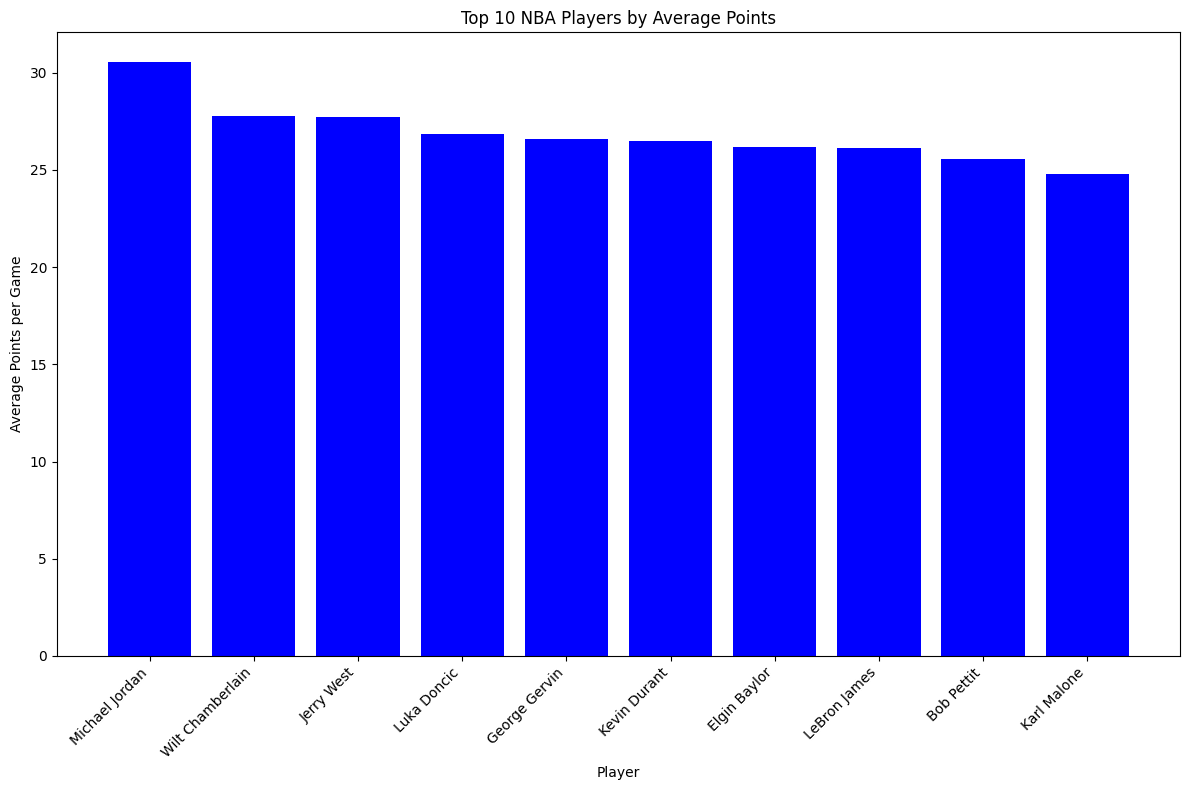

In [50]:
# Top scorers bar chart
plt.figure(figsize=(12, 8))
top_scorers = player_stats.head(10)
plt.bar(top_scorers.index, top_scorers['points'], color='blue')
plt.title('Top 10 NBA Players by Average Points')
plt.xlabel('Player')
plt.ylabel('Average Points per Game')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_scorers.png')
plt.show()

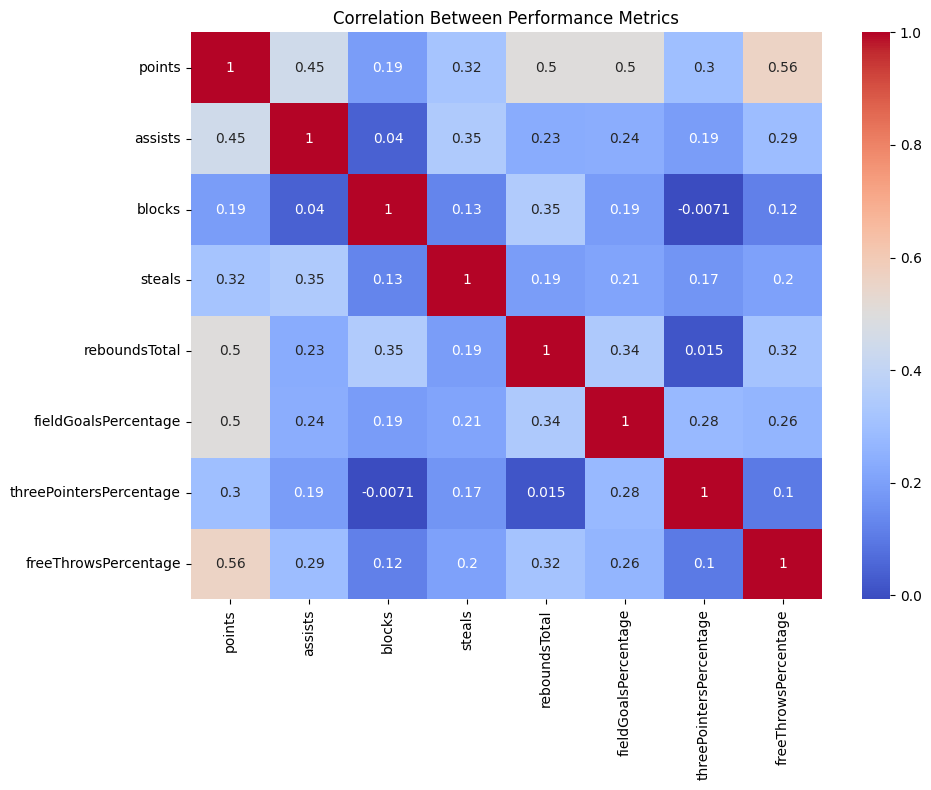

In [32]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation = nba_data[key_metrics].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Performance Metrics')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()